In [8]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
import random
import os
import glob
%matplotlib inline

In [14]:
img_files = os.listdir('/home/ubuntu/lettuce_growth_monitoring/Plants-8/train/images')
filename = random.choice(img_files)
img_file = os.path.join('/home/ubuntu/lettuce_growth_monitoring/Plants-8/train/images', filename)
label_file = os.path.join('/home/ubuntu/lettuce_growth_monitoring/Plants-8/train/labels', filename[:-3]+'txt')
print(img_file)
print(label_file)

/home/ubuntu/lettuce_growth_monitoring/Plants-8/train/images/butterhead_lettuce_195_jpg.rf.1d9ea2f458a0d23cf2c8f78563ab5c68.jpg
/home/ubuntu/lettuce_growth_monitoring/Plants-8/train/labels/butterhead_lettuce_195_jpg.rf.1d9ea2f458a0d23cf2c8f78563ab5c68.txt


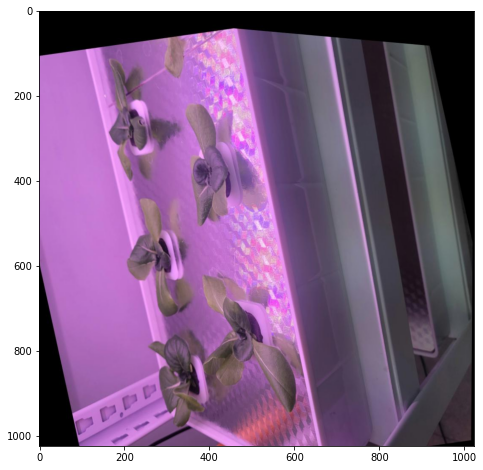

In [15]:
img = cv2.imread(img_file)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)


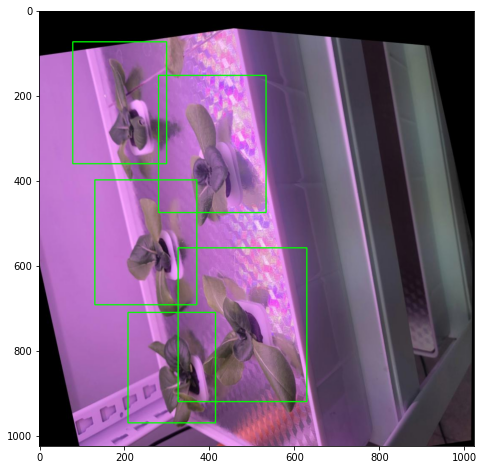

In [16]:
with open(label_file, 'r') as f:
    objs = f.readlines()

boxes = []
for obj in objs:
    box = obj.split()
    box = [float(i) for i in box]
    boxes.append(box)

draw_img = img_rgb.copy()
img_height = img_rgb.shape[0]
img_width = img_rgb.shape[1]

for box in boxes:
    classId = int(box[0])
    cx = img_width * box[1]
    cy = img_height * box[2]
    w = img_width * box[3]
    h = img_height * box[4]
    left = int(cx - w/2)
    top = int(cy - h/2)
    right = int(cx + w/2)
    bottom = int(cy + w/2)

    cv2.rectangle(draw_img, (left, top), (right, bottom), (0, 255, 0), thickness=2)

plt.figure(figsize=(8,8))
plt.imshow(draw_img)

In [9]:
label_files = glob.glob('/home/ubuntu/lettuce_growth_monitoring/Plants-seg/train/labels/*.txt')
seg_files = []
seg_ann = []
for label_file in label_files:
    with open(label_file) as f:
        objs = f.readlines()

    for obj in objs:
        ann = obj.split()
        ann = [float(i) for i in ann]
        if len(ann) - 1 > 4:
            seg_files.append(label_file)
            seg_ann.append(ann)

seg_files = list(set(seg_files))
print('# of total seg_files: ', len(label_files))
print('# of seg-files: ', len(seg_files))
# print(seg_files)
print('# of seg-ann', len(seg_ann))


# of total seg_files:  50
# of seg-files:  50
# of seg-ann 1242


In [10]:
seg_file = random.choice(seg_files)
print(seg_file)

/home/ubuntu/lettuce_growth_monitoring/Plants-seg/train/labels/Tip_Burn_110_jpg.rf.b3a62af73b9a2a628b7e4703e681c3a6.txt


In [11]:
img_file = seg_file.replace('labels', 'images')
img_file = img_file.replace('txt', 'jpg')
print(img_file)

/home/ubuntu/lettuce_growth_monitoring/Plants-seg/train/images/Tip_Burn_110_jpg.rf.b3a62af73b9a2a628b7e4703e681c3a6.jpg


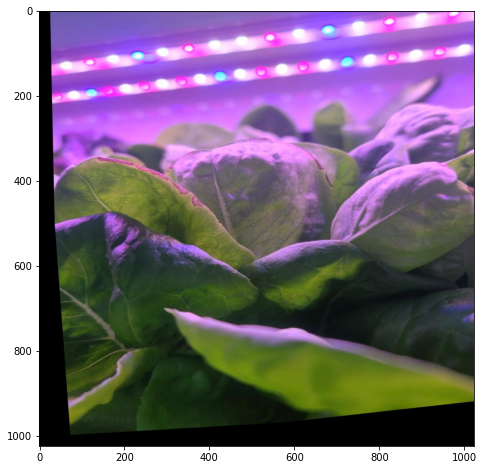

In [12]:
img = cv2.imread(img_file)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

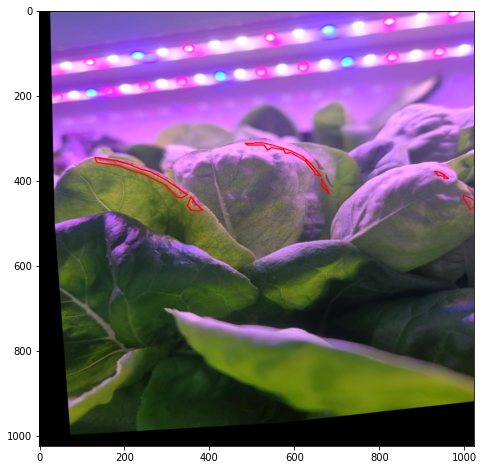

In [13]:
with open(seg_file, 'r') as f:
    objs = f.readlines()

boxes = []
for obj in objs:
    box = obj.split()
    box = [float(i) for i in box]
    boxes.append(box)

draw_img = img_rgb.copy()
img_height = img_rgb.shape[0]
img_width = img_rgb.shape[1]
isClosed = True
color = (255, 0, 0)
thickness = 2

for box in boxes:
    pts = []
    for i, p in enumerate(box[1:]):
        if i % 2 == 0:
            x = int(p * img_width)
        else:
            y = int(p * img_height)
            pt = [x, y]
            pts.append(pt)

    pts = np.array(pts)
    pts = pts.reshape((-1, 1, 2))
    cv2.polylines(draw_img, [pts], isClosed, color, thickness)

plt.figure(figsize=(8,8))
plt.imshow(draw_img)